# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [34]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7, 1e-6]
regularization_strengths = [1e4, 1e5, 1e6, 1e7, 1e8]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for learning_rate in learning_rates:
    for reg in regularization_strengths:
        print learning_rate, reg
        svm = LinearSVM()
        loss = svm.train(X_train_feats, y_train, learning_rate=learning_rate, reg=reg,
                      num_iters=2000, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = (np.mean(y_train == y_train_pred))
        y_val_pred = svm.predict(X_val_feats)
        valid_accuracy = (np.mean(y_val == y_val_pred))
        results[(learning_rate, reg)] = (train_accuracy, valid_accuracy)
        if best_val == -1 or valid_accuracy > best_val:
            best_val = valid_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

1e-09 10000.0
Init Weight ***
iteration 0 / 2000: loss 16.444147
iteration 300 / 2000: loss 16.392257
iteration 600 / 2000: loss 16.391311
iteration 900 / 2000: loss 16.322489
iteration 1200 / 2000: loss 16.263068
iteration 1500 / 2000: loss 16.233019
iteration 1800 / 2000: loss 16.196997
1e-09 100000.0
Init Weight ***
iteration 0 / 2000: loss 85.895489
iteration 300 / 2000: loss 81.399486
iteration 600 / 2000: loss 77.179506
iteration 900 / 2000: loss 73.234732
iteration 1200 / 2000: loss 69.491338
iteration 1500 / 2000: loss 65.963501
iteration 1800 / 2000: loss 62.628412
1e-09 1000000.0
Init Weight ***
iteration 0 / 2000: loss 784.627145
iteration 300 / 2000: loss 434.546641
iteration 600 / 2000: loss 242.477775
iteration 900 / 2000: loss 137.096903
iteration 1200 / 2000: loss 79.280861
iteration 1500 / 2000: loss 47.558980
iteration 1800 / 2000: loss 30.151470
1e-09 10000000.0
Init Weight ***
iteration 0 / 2000: loss 7700.729403
iteration 300 / 2000: loss 27.498818
iteration 600 / 

In [35]:
best_svm = LinearSVM()
best_learning_rate = 1e-6 #learning_rates[0]
best_reg = 1e5 #regularization_strengths[0]
loss = best_svm.train(X_train_feats, y_train, learning_rate=best_learning_rate, reg=best_reg,
                      num_iters=10000, verbose=True)

Init Weight ***
iteration 0 / 10000: loss 86.249404
iteration 300 / 10000: loss 8.999637
iteration 600 / 10000: loss 8.999688
iteration 900 / 10000: loss 8.999630
iteration 1200 / 10000: loss 8.999712
iteration 1500 / 10000: loss 8.999646
iteration 1800 / 10000: loss 8.999639
iteration 2100 / 10000: loss 8.999714
iteration 2400 / 10000: loss 8.999665
iteration 2700 / 10000: loss 8.999668
iteration 3000 / 10000: loss 8.999652
iteration 3300 / 10000: loss 8.999649
iteration 3600 / 10000: loss 8.999590
iteration 3900 / 10000: loss 8.999640
iteration 4200 / 10000: loss 8.999724
iteration 4500 / 10000: loss 8.999687
iteration 4800 / 10000: loss 8.999583
iteration 5100 / 10000: loss 8.999647
iteration 5400 / 10000: loss 8.999655
iteration 5700 / 10000: loss 8.999705
iteration 6000 / 10000: loss 8.999725
iteration 6300 / 10000: loss 8.999743
iteration 6600 / 10000: loss 8.999633
iteration 6900 / 10000: loss 8.999653
iteration 7200 / 10000: loss 8.999681
iteration 7500 / 10000: loss 8.999639
i

In [36]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.42


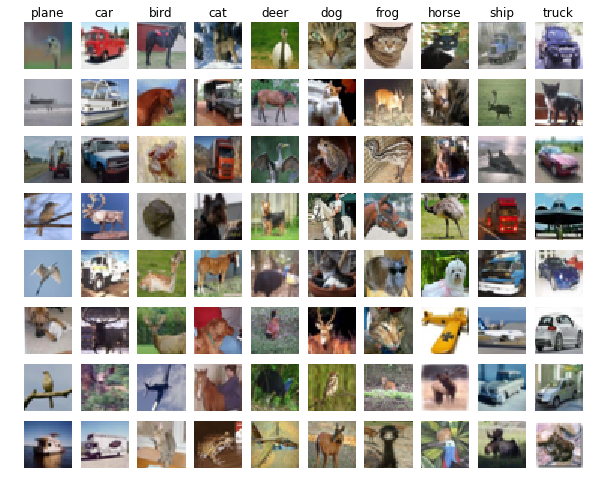

In [37]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [84]:
print y_train.shape

(49000,)


In [114]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 50
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

best_val_acc = None
best_lr = None
best_reg = None
# for learning_rate in np.power(10,np.arange(-7,-1,0.05)):# np.linspace(0.001014, 0.001041, 5):#np.linspace(0.001000,0.001122,10): #np.power(10,np.arange(-4,-1,0.05)):
for reg in np.linspace(0.001,0.009,10):
# if True:
#     print learning_rate
#     for reg in regularization_strengths:
    if True:
        learning_rate = 0.4511
        #     learning_rate=0.002041
        #     learning_rate=0.000941
        #     learning_rate = np.random.uniform(0.001,1) * np.random.uniform(0,1)
        #     print learning_rate
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=2000, batch_size=200,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=reg, dropout_percent=0.0, verbose=True)

        # Predict on the validation set
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        print 'lr=%0.9f, reg=%f Validation accuracy: %f'%(learning_rate,reg,val_acc)
        if best_val_acc == None or val_acc > best_val_acc:
            best_net = net
            best_lr = learning_rate
            best_val_acc = val_acc
            best_reg = reg

print "Best lr=", learning_rate
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 2000: loss 2.302585
iteration 300 / 2000: loss 1.510592
iteration 600 / 2000: loss 1.262032
iteration 900 / 2000: loss 1.251488
iteration 1200 / 2000: loss 1.152299
iteration 1500 / 2000: loss 1.252148
iteration 1800 / 2000: loss 1.103569
lr=0.451100000, reg=0.001000 Validation accuracy: 0.559000
iteration 0 / 2000: loss 2.302585
iteration 300 / 2000: loss 1.508776
iteration 600 / 2000: loss 1.397734
iteration 900 / 2000: loss 1.380863
iteration 1200 / 2000: loss 1.277766
iteration 1500 / 2000: loss 1.268686
iteration 1800 / 2000: loss 1.216129
lr=0.451100000, reg=0.001889 Validation accuracy: 0.560000
iteration 0 / 2000: loss 2.302585
iteration 300 / 2000: loss 1.340527
iteration 600 / 2000: loss 1.406176
iteration 900 / 2000: loss 1.295294
iteration 1200 / 2000: loss 1.376688
iteration 1500 / 2000: loss 1.160671
iteration 1800 / 2000: loss 1.178438
lr=0.451100000, reg=0.002778 Validation accuracy: 0.585000
iteration 0 / 2000: loss 2.302585
iteration 300 / 2000: loss 1.3

In [150]:
best_lr = 0.451100000*0.80
best_net = TwoLayerNet(input_dim, hidden_dim, num_classes)
stats = best_net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=10000, batch_size=200,
                    learning_rate=best_lr, learning_rate_decay=0.95,
                    reg=best_reg, dropout_percent=0.3, verbose=True)

iteration 0 / 10000: loss 2.302585
iteration 300 / 10000: loss 1.376355
iteration 600 / 10000: loss 1.319679
iteration 900 / 10000: loss 1.310571
iteration 1200 / 10000: loss 1.227276
iteration 1500 / 10000: loss 1.261069
iteration 1800 / 10000: loss 1.219075
iteration 2100 / 10000: loss 1.251124
iteration 2400 / 10000: loss 1.395568
iteration 2700 / 10000: loss 1.296352
iteration 3000 / 10000: loss 1.352522
iteration 3300 / 10000: loss 1.227758
iteration 3600 / 10000: loss 1.170113
iteration 3900 / 10000: loss 1.079476
iteration 4200 / 10000: loss 1.205998
iteration 4500 / 10000: loss 1.196429
iteration 4800 / 10000: loss 1.221007
iteration 5100 / 10000: loss 1.372510
iteration 5400 / 10000: loss 1.290447
iteration 5700 / 10000: loss 1.279934
iteration 6000 / 10000: loss 1.295469
iteration 6300 / 10000: loss 1.109567
iteration 6600 / 10000: loss 1.138794
iteration 6900 / 10000: loss 1.065903
iteration 7200 / 10000: loss 1.164357
iteration 7500 / 10000: loss 1.184156
iteration 7800 / 1

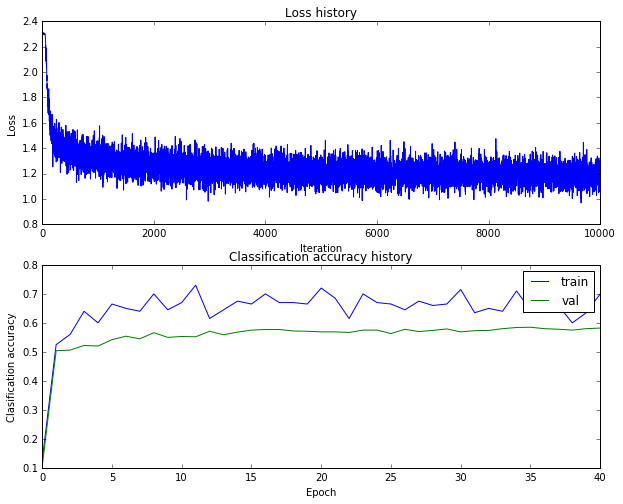

In [148]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [151]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print test_acc

0.555


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!